obj val:  9.608656082828517
orginal airports:  [(0.9108200534696371, 0.8891080278031528), (0.06430654439715289, 0.7283936017043685), (0.11070861814130195, 0.2008143583610238)]
gradients for airport  0   0.24368563633833784 0.04328476009238712
gradients for airport  1   -0.09666715392577738 0.08208662281936897
gradients for airport  2   -0.08542911986663876 -0.02174164316161307
airports:  [(0.6671344171312993, 0.8458232677107657), (0.16097369832293026, 0.6463069788849996), (0.1961377380079407, 0.22255600152263685)]
gradients for airport  0   0.04873712726766749 0.00865695201847742
gradients for airport  1   -0.05379778581244327 0.09906141382785463
gradients for airport  2   -0.02995246072193619 0.049619031118030836
airports:  [(0.6183972898636318, 0.8371663156922883), (0.21477148413537353, 0.547245565057145), (0.2260901987298769, 0.172936970404606)]
gradients for airport  0   0.00974742545353356 0.001731390403695514
gradients for airport  1   -0.004216937300590997 0.060203275226337054
g

<module 'matplotlib.pyplot' from '/Users/michaelching/PycharmProjects/CECS 451/Assignment #5/venv/lib/python3.10/site-packages/matplotlib/pyplot.py'>

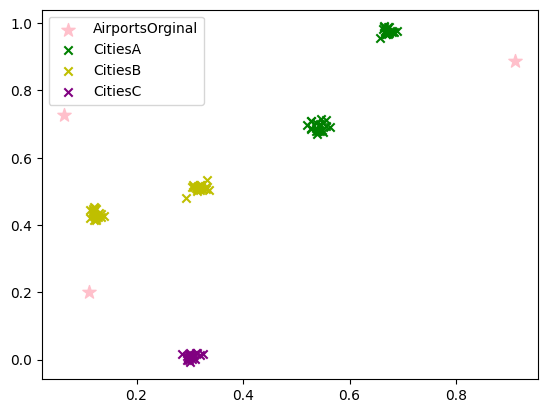

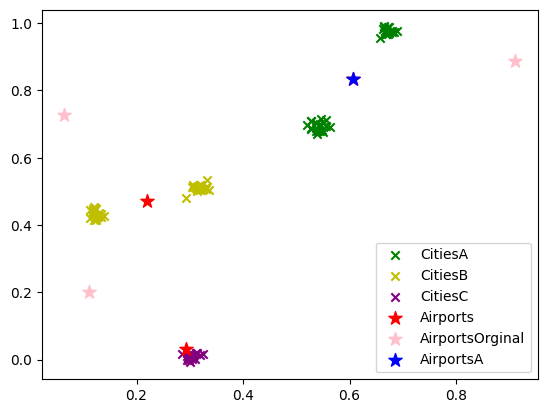

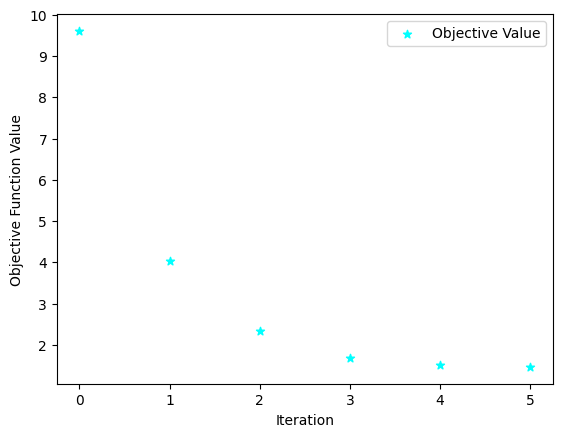

In [171]:
import math
import random
import numpy as np


def findClosestCity(cities, airports, cityA, cityB, cityC):

    #Empty sets
    cityA.clear()
    cityB.clear()
    cityC.clear()

    #For all cities
    for city in cities:

        cityXCord = city[0]
        cityYCord = city[1]
        distance = 100000000
        airportNum = -1

        #For each airport see which is closest to city
        for i in range (num_air):

            airportXCord = airports[i][0]
            airportYCord = airports[i][1]

            #Distance formula
            tempCal = math.sqrt( (airportXCord - cityXCord)**2 + (airportYCord - cityYCord)**2 )

            #Found an airport closer to city
            if(tempCal < distance):
                distance = tempCal
                airportNum = i


        if(airportNum == 0):
            cityA.add(city)

        if(airportNum == 1):
            cityB.add(city)

        if(airportNum == 2):
            cityC.add(city)


#Calculates the objective funciton value
def objectiveFunct(closeCityList, airports):
    totalDistance = 0

    #For each airport
    for i in range(len(airports)):

        airportXCord = airports[i][0]
        airportYCord = airports[i][1]


        #For each set of cities closest to an airport
        for city in closeCityList[i]:
            cityXCord = city[0]
            cityYCord = city[1]

            x = (airportXCord - cityXCord)**2
            y = (airportYCord - cityYCord)**2
            totalDistance = totalDistance + x + y


    return totalDistance


num_city = 100
num_air = 3
num_center = 5
#sigma = 0.1
sigma = 0.01
cities = set()
airports = []

for i in range(num_center):
    x = random.random()
    y = random.random()
    xc = np.random.normal(x, sigma, num_city//num_center)
    yc = np.random.normal(y, sigma, num_city//num_center)
    cities = cities.union(zip(xc, yc))


for i in range(num_air):
    x = random.random()
    y = random.random()
    airports.append((x,y))



#Create set of cities for closest airport
cityA = set()
cityB =  set()
cityC = set()

closeCityList = []
closeCityList.append(cityA)
closeCityList.append(cityB)
closeCityList.append(cityC)
findClosestCity(cities, airports, cityA, cityB, cityC)
val = objectiveFunct(closeCityList, airports)
print('obj val: ', val)

objVals = []
prevObjVal = 10000


temp1 = airports[0]
temp2 = airports[1]
temp3 = airports[2]
airportOrgin = []
airportOrgin.append(temp1)
airportOrgin.append(temp2)
airportOrgin.append(temp3)


#Check the objective function value changes
change = 10
iteration = 0
print('orginal airports: ', airports)

#Repeat objective function till miniminal change
while (change > 0.1):

    findClosestCity(cities, airports, cityA, cityB, cityC)
    val = objectiveFunct(closeCityList, airports)
    objVals.append((iteration, val))
    iteration = iteration + 1
    change = abs(val - prevObjVal)
    prevObjVal = val

    #For each airport
    for i in range(len(airports)):
        airportXCord = airports[i][0]
        airportYCord = airports[i][1]

        #Calculate summations for each individual city and individual axis
        summationX = 0
        summationY = 0

        #For each city closest to a particular airport
        for city in closeCityList[i]:
            cityXCord = city[0]
            cityYCord = city[1]

            summationX = summationX + (airportXCord - cityXCord)
            summationY = summationY + (airportYCord - cityYCord)

        #After completing summations, multiply by 2 for partial derivatives
        gradientX = summationX * 2
        gradientY = summationY * 2
        #print('PREgradients for airport ', i , ' ', gradientX, gradientY)

        #Multiply with small constant
        gradientX = gradientX * sigma
        gradientY = gradientY * sigma

        #Possible Test
        #gradientX = airportXCord * gradientX
        #gradientY = airportYCord * gradientY

        print('gradients for airport ', i , ' ', gradientX, gradientY)
        #airports[i] = (gradientX, gradientX)

        #Update location of airport
        newLocX = airportXCord - gradientX
        newLocY = airportYCord - gradientY
        airports[i] = (newLocX, newLocY)

    print('airports: ', airports)


    if(iteration == 10):
        change = 0







findClosestCity(cities, airports, cityA, cityB, cityC)
val = objectiveFunct(closeCityList, airports)
print(val)





#Repeat objective function
#while (change < 0.5):
#for i in range(2):
#
    #Find/update the cities closest to an airport
#    findClosestCity(airports, cityA, cityB, cityC)
#    val = objectiveFunct(closeCityList, airports)
#    print('obj val: ', val)

    #Airport A
#    airportX = airports[0][0]
#    airportY = airports[0][1]
 #   print(airports)
 #   print('airportCords', 'x: ', airportX , ' y: ' , airportY)
#    x = 0
#    y = 0
#    print("Cities closest to Airport A" , cityA)
#    print()
#    print()

#    for city in cityA:
#        x = x + (airportX - city[0])
#        y = y + (airportY - city[1])
#        print('x' , x)
#        print('y' , y)
#
#    x = x * 2
#    y = y * 2

 #   print('x' , x)
#    print('airport x cord', airports[0][0])
#    print('sigma*: ', (sigma * x))

#    gradX = airports[0][0] - (sigma * x)
#    gradY = airports[0][1] - (sigma * y)
#    print ('gradX', gradX)
#    print ('gradY', gradY)

#    airports[0] = (gradX,gradY)
#    print("airport0", airports[0])






#airports[1] = (0,0)
#airports[2] = (0,0)




#Implement gradient
#for i in range(num_air):

 #   airportX = airports[i][0]
  #  airportY = airports[i][1]

   # x = 0
    #y = 0

   # for city in cities:
   #     x = x + (airportX - city[0])**2
   #     y = y + (airportY - city[1])**2


   # x = airports[i][0] - (sigma * x)
   # y = airports[i][1] - (sigma * y)
   # airports[i] = (x,y)



print ('airport cords', airports)

print('cityA: ', cityA)
print('cityB: ', cityB)
print('cityC: ', cityC)

import matplotlib.pyplot as plt


#Orginal state
plt.figure(3)
zip_airsOrgin = zip(*airportOrgin)
plt.scatter(*zip_airsOrgin, marker='*', color='pink', s=100, label='AirportsOrginal')

zip_citiesA = zip(*cityA)
plt.scatter(*zip_citiesA, marker='x',color='green', label='CitiesA')

zip_citiesB = zip(*cityB)
plt.scatter(*zip_citiesB, marker='x',color='y', label='CitiesB')

zip_citiesC = zip(*cityC)
plt.scatter(*zip_citiesC, marker='x',color='purple', label='CitiesC')
plt.legend()

#Plot figure for locations
plt.figure(1)
zip_citiesA = zip(*cityA)
plt.scatter(*zip_citiesA, marker='x',color='green', label='CitiesA')

zip_citiesB = zip(*cityB)
plt.scatter(*zip_citiesB, marker='x',color='y', label='CitiesB')

zip_citiesC = zip(*cityC)
plt.scatter(*zip_citiesC, marker='x',color='purple', label='CitiesC')

#zip_cities = zip(*cities)
#plt.scatter(*zip_cities, marker='+',color='b', label='Cities')
zip_airs = zip(*airports)
plt.scatter(*zip_airs, marker='*', color='r', s=100, label='Airports')

zip_airsOrgin = zip(*airportOrgin)
plt.scatter(*zip_airsOrgin, marker='*', color='pink', s=100, label='AirportsOrginal')

plt.scatter(airports[0][0], airports[0][1], marker='*', color='blue', s=100, label='AirportsA')
plt.legend()


#Plot figure for objective values
plt.figure(2)
zip_objFuncVal = zip(*objVals)
plt.scatter(*zip_objFuncVal, marker='*',color='cyan', label='Objective Value')
plt.xlabel('Iteration')
plt.ylabel('Objective Function Value')


plt.legend()
plt